### 1. Import required libraries and read the dataset.

In [212]:
import numpy as np
import pandas as pd
# Libraries used for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  
import warnings
warnings.filterwarnings('ignore')

In [213]:
#reading the dataset
data=pd.read_csv("Apps_data+(1).csv")

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [215]:
data.shape

(10841, 13)

In [216]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [217]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.


In [218]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [219]:
data.describe(include="O")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


### 4. Check if there are any duplicate records in the dataset? if any drop them.


In [220]:
data.duplicated().any

<bound method NDFrame._add_numeric_operations.<locals>.any of 0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool>

In [221]:
data.drop_duplicates(inplace=True)

In [222]:
data.shape

(10358, 13)

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [223]:
data["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [224]:
data = data.drop(data[data["Category"] == "1.9"].index)

In [225]:
data["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

here,1.9 is completely different from others in the category. so we decided to drop them though it doesnt show any significance in analysis

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [226]:
data.shape

(10357, 13)

In [227]:
data["Rating"].isnull().sum()

1465

In [228]:
data = data.dropna()
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [229]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [230]:
data.shape

(8886, 13)

In [231]:
data['Rating_category'] = ['high' if x > 3.5 else 'low' for x in data['Rating']]

In [232]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,high
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,high
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,high
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,high
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,high


### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


In [233]:
data['Rating_category'].value_counts()

high    8007
low      879
Name: Rating_category, dtype: int64

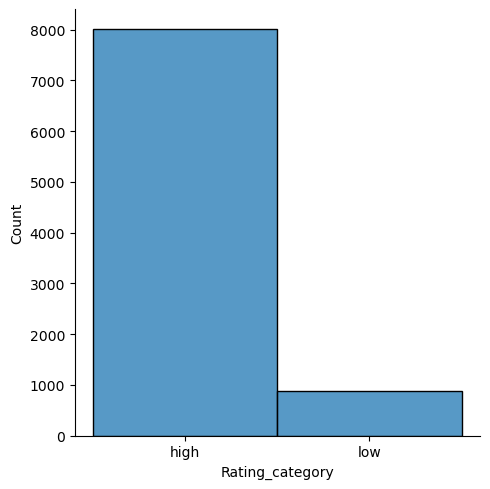

In [234]:
sns.displot(data['Rating_category'],kde=False)
plt.show()

here the distribution is highly skewed

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [235]:
data["Reviews"]=data["Reviews"].astype(int)

In [236]:
data["Reviews"].dtype

dtype('int32')

In [237]:
data['Reviews'] = np.log(data['Reviews'])

In [238]:
Q1 = np.percentile(data['Reviews'], 25)
Q3 = np.percentile(data['Reviews'], 75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
outliers = data[(data['Reviews'] < lower_bound) | (data['Reviews'] > upper_bound)]
print("Total number of outliers after log transformation for outlier treatment:")
outliers.count()

Total number of outliers after log transformation for outlier treatment:


App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        0
Android Ver        0
Rating_category    0
dtype: int64

Text(0.5, 1.0, "BoxPlot for Analyzing Outlier's after Log transformation.")

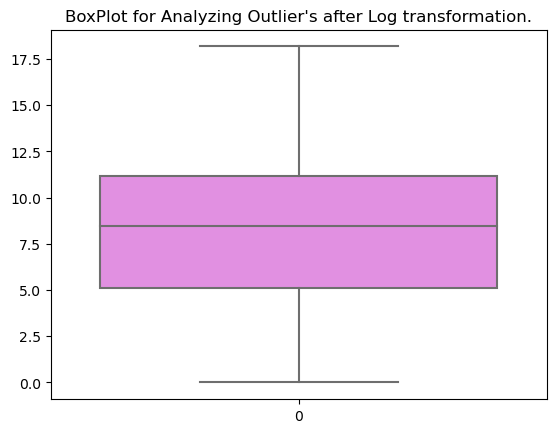

In [239]:
sns.boxplot(data["Reviews"], color="violet" )
plt.title("BoxPlot for Analyzing Outlier's after Log transformation.")

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')


In [240]:
data["Size"]

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8886, dtype: object

In [241]:
data["Size"] = data["Size"].apply(lambda x : x.replace(",",""))

In [242]:
# Replacing alphabetical to numerical
data["Size"] = data["Size"].str.replace("M","000000")

In [243]:
data["Size"] = data["Size"].str.replace("k","000")

In [244]:
data = data.drop(data[data["Size"] == "Varies with device"].index)

In [245]:
data["Size"]

0         19000000
1         14000000
2        8.7000000
3         25000000
4        2.8000000
           ...    
10833       619000
10834    2.6000000
10836     53000000
10837    3.6000000
10840     19000000
Name: Size, Length: 7418, dtype: object

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.


In [246]:
data["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [247]:
data["Installs"]=data["Installs"].str.replace("+","").replace(",","")

In [248]:
data["Installs"]

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10833         1,000
10834           500
10836         5,000
10837           100
10840    10,000,000
Name: Installs, Length: 7418, dtype: object

In [249]:
data["Installs"].convert_dtypes()

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10833         1,000
10834           500
10836         5,000
10837           100
10840    10,000,000
Name: Installs, Length: 7418, dtype: string

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [250]:
data["Price"]

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7418, dtype: object

In [251]:
data["Price"].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [252]:
data["Price"]=data["Price"].str.replace("$","").replace(",","")

In [253]:
data["Price"].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',m'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [254]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [255]:
data.drop(["Rating","App","Genres","Last Updated","Current Ver","Android Ver"],axis=1,inplace=True)

In [256]:
data.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category'],
      dtype='object')

In [257]:
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000,"10,000",Free,0,Everyone,high
1,ART_AND_DESIGN,6.874198,14000000,"500,000",Free,0,Everyone,high
2,ART_AND_DESIGN,11.379508,8.7000000,"5,000,000",Free,0,Everyone,high
3,ART_AND_DESIGN,12.281384,25000000,"50,000,000",Free,0,Teen,high
4,ART_AND_DESIGN,6.874198,2.8000000,"100,000",Free,0,Everyone,high


### 13. Encode the categorical columns.

In [258]:
from sklearn.preprocessing import LabelEncoder
data1 = LabelEncoder()

# Encode categorical columns
data['Category'] = data1.fit_transform(data['Category'])
data['Type'] = data1.fit_transform(data['Type'])
data['Rating_category'] = data1.fit_transform(data['Rating_category'])
data['Content Rating'] = data1.fit_transform(data['Content Rating'])

In [259]:
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,5.068904,19000000,"10,000",0,0,1,0
1,0,6.874198,14000000,"500,000",0,0,1,0
2,0,11.379508,8.7000000,"5,000,000",0,0,1,0
3,0,12.281384,25000000,"50,000,000",0,0,4,0
4,0,6.874198,2.8000000,"100,000",0,0,1,0


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [260]:
X=data.drop(["Rating_category"],axis=1)
Y =data[["Rating_category"]]

In [261]:
X


,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,5.068904,19000000,"10,000",0,0,1
1,0,6.874198,14000000,"500,000",0,0,1
2,0,11.379508,8.7000000,"5,000,000",0,0,1
3,0,12.281384,25000000,"50,000,000",0,0,4
4,0,6.874198,2.8000000,"100,000",0,0,1
...,...,...,...,...,...,...,...
10833,3,3.784190,619000,"1,000",0,0,1
10834,11,1.945910,2.6000000,500,0,0,1
10836,11,3.637586,53000000,"5,000",0,0,1
10837,11,1.386294,3.6000000,100,0,0,1


In [282]:
Y

,Rating_category
0,0
1,0
2,0
3,0
4,0
...,...
10833,0
10834,0
10836,0
10837,0


### 15. Split the dataset into train and test.

In [283]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [284]:
X_train.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
4407,14,10.292315,69000000,"1,000,000",0,0,1
5679,14,10.098725,25000000,"500,000",0,0,1
6119,11,1.098612,10000000,50,0,0,1
1564,18,6.398595,5.1000000,"100,000",0,0,1
8295,19,10.897369,5.8000000,"5,000,000",0,0,4


In [285]:
X_test.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
2655,26,15.641832,15000000,"100,000,000",0,0,1
9095,12,6.464588,3.2000000,"10,000",0,0,1
10229,27,4.682131,2.8000000,"10,000",0,0,4
3224,30,11.916542,4.1000000,"10,000,000",0,0,1
6891,18,9.210940,53000000,"1,000,000",0,0,1


### 16. Standardize the data, so that the values are within a particular range.

In [286]:
from sklearn.preprocessing import StandardScaler
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7418 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7418 non-null   int32  
 1   Reviews          7418 non-null   float64
 2   Size             7418 non-null   float64
 3   Installs         7418 non-null   int32  
 4   Type             7418 non-null   int32  
 5   Price            7418 non-null   float64
 6   Content Rating   7418 non-null   int32  
 7   Rating_category  7418 non-null   int32  
dtypes: float64(3), int32(5)
memory usage: 376.7 KB


In [292]:
data['Size'] = data['Size'].replace(",","").replace("+","").astype(float)
data['Installs'] = data["Installs"].replace(",","").astype(int)
data['Price'] = data['Price'].replace(",","").astype(float)

In [293]:
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,5.068904,19000000.0,10000,0,0.0,1,0
1,0,6.874198,14000000.0,500000,0,0.0,1,0
2,0,11.379508,8.7,5000000,0,0.0,1,0
3,0,12.281384,25000000.0,50000000,0,0.0,4,0
4,0,6.874198,2.8,100000,0,0.0,1,0


In [296]:
scalar=StandardScaler
data1=scalar.fit_transform(data)

TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'

In [270]:
data

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,5.068904,19000000.0,10000,0,0.0,1,0
1,0,6.874198,14000000.0,500000,0,0.0,1,0
2,0,11.379508,8.7,5000000,0,0.0,1,0
3,0,12.281384,25000000.0,50000000,0,0.0,4,0
4,0,6.874198,2.8,100000,0,0.0,1,0
...,...,...,...,...,...,...,...,...
10833,3,3.784190,619000.0,1000,0,0.0,1,0
10834,11,1.945910,2.6,500,0,0.0,1,0
10836,11,3.637586,53000000.0,5000,0,0.0,1,0
10837,11,1.386294,3.6,100,0,0.0,1,0
